In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os
import sys
import urllib
import matplotlib.image as mpimg
from PIL import Image
import code
from helper import *

In [ ]:
TRAIN_IMAGES = 'data/training/images/'
GROUNDTRUTH = 'data/training/groundtruth/'
TEST_IMAGES = 'data/test_set_images/'
FOREGROUND_TRESHOLD = 0.25
SPLIT_RATIO = 0.9
PATCH_SIZE = 16

## 1. Load Data

In [ ]:
all_training_imgs = load_images_from_folder(TRAIN_IMAGES)
gt_imgs = load_images_from_folder(GROUNDTRUTH)

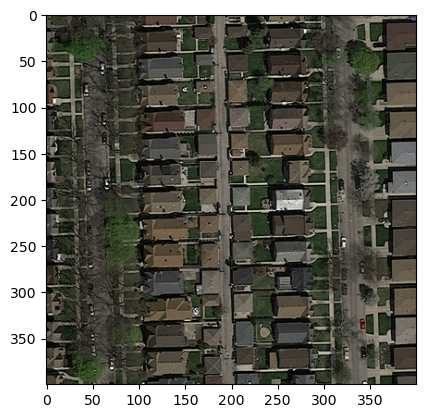

In [ ]:
plt.imshow(all_training_imgs[0])

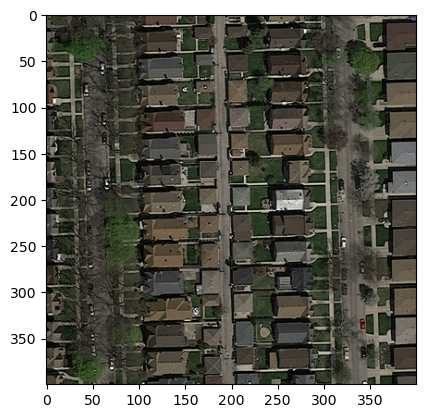

In [ ]:
plt.imshow(all_training_imgs[0], cmap='gray')

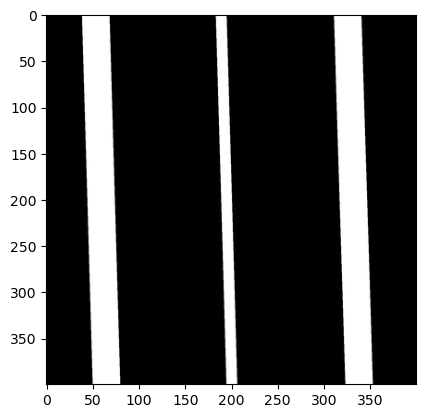

In [ ]:
plt.imshow(gt_imgs[0], cmap='gray')

## 2. Patch Extraction

In [ ]:
all_training_size = len(all_training_imgs)
all_training_patches = [img_crop(all_training_imgs[i], PATCH_SIZE, PATCH_SIZE) for i in range(all_training_size)]
gt_patches = [img_crop(gt_imgs[i], PATCH_SIZE, PATCH_SIZE) for i in range(all_training_size)]

In [ ]:
# Linarize the patches 
all_training_patches = np.asarray(
    [
        all_training_patches[i][j]
        for i in range(len(all_training_patches))
        for j in range(len(all_training_patches[i]))
    ]
)
gt_patches = np.asarray(
    [
        gt_patches[i][j]
        for i in range(len(gt_patches))
        for j in range(len(gt_patches[i]))
    ]
)

In [ ]:
print(f"all training patches shape: ",all_training_patches.shape)
print(f"gt patches shape: ",gt_patches.shape)

all training patches shape:  (62500, 16, 16, 3)
gt patches shape:  (62500, 16, 16)


## 3. Label Extraction

In [ ]:
Y = np.asarray([value_to_class(np.mean(gt_patches[i]),FOREGROUND_TRESHOLD) for i in range(len(gt_patches))])

# 4.Model

In [ ]:
def create_model(input_size, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=input_size))

    # Add custom layers for segmentation on top of ResNet
    x = base_model.output
    x = UpSampling2D()(x)
    x = Concatenate()([base_model.get_layer('conv4_block6_out').output, x])
    x = Conv2D(num_classes, (1, 1), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [ ]:
model = create_model(input_size=(PATCH_SIZE, PATCH_SIZE, 3), num_classes=NUM_LABELS)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


NameError: name 'IMG_HEIGHT' is not defined